# Predicting the optimal placement of a hospital in Toronto

## Table of Contents    
  * [Introduction: Business Problem](#intro)
  * [Data](#data)

## Introduction: Business Problem <a id="intro"></a>

<p> 
    For this project we will be trying to determine the best possible location to open an additional medical centre/ hospital in the city of Toronto. Many a time one might hear news about how there may not be enough space at a hospital for all the patients needing help and when there comes a time like an epidemic or a pandemic (as is the current state of things in the world), this is especially the case. 

</p>
    
<p>    
    This report will be of interest to the board of directors and stakeholders of the hospital in question as well as the city of Toronto staff who would help oversee its development. 
    
</p>

<p>
    Our aim is to look for populated areas in neighbourhoods where there appears to be more young children and elderly present. Once those neighbourhoods have been found, we will then search the surrounding area for any other such health centres in the vicinity as we would like to construct the hospital in a distance far enough away from the others in an area where it would be most needed.
    
<p>

<p>
    Using this criteria and our purpose along with relevant data to provide support, we aim to share our findings and reasonings for our choices with the city of Toronto staff, hospital board of directors, and stakeholders, on where we would advise them to construct the health centre.
    
</p>

## Data <a id="data"></a>

<p> 
    As mentioned above in the business problem, the factors that will influence our decision are:
</p>
      
  * The number of hospitals/ health centres in the area
  * The number of people in the area
  * Ages of the constituents of the neighbourhood

<p> We will be using the following data sources for our analysis:</p>

  * **[Toronto neighbourhoods data](https://open.toronto.ca/dataset/neighbourhoods/)** - *Attribution: [Open Data Licence - Toronto](https://open.toronto.ca/open-data-license/); Contains information licensed under the Open Government Licence – Toronto* 

<p>This csv dataset will be used to obtain the initial neighbourhood profiles and their geographical coordinates using the area_name, longitude and latitude columns. </p>

  * **[Toronto neighbourhood profiles data](https://open.toronto.ca/dataset/neighbourhood-profiles/)** - *Attribution: [Open Data Licence - Toronto](https://open.toronto.ca/open-data-license/); Contains information licensed under the Open Government Licence – Toronto*
  
<p>This source will be used to determine the age of the constituents in their respective neighbourhoods. In our case, we will be finding and using the appropriate rows with the population age characteristics data for seniors and children. Using the csv dataset we will also locate the number code for each neighbourhood and match it to the relevant area code column of the previous dataset in order to connect the data.  </p>

  * **[Foursquare API](https://developer.foursquare.com/docs/)** 

<p>This API will be used to determine the location and number of hospitals in the Toronto area. We will then proceed to visualize this data through a map using Folium so we can see where the hospitals are situated and their distances from one another.</p>


### Import libraries

In [1]:
import pandas as pd
import numpy as np

!pip install geopy
from geopy.geocoders import Nominatim

#Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#K-means from clustering stage
from sklearn.cluster import KMeans

#folium
!pip install folium
import folium

     |████████████████████████████████| 92kB 7.6MB/s eta 0:00:011


### Define Foursquare Credentials and Version

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# Define instance of geocoder

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Toronto, Ontario are {}, {}.'.format(latitude, longitude))


The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


### Mapping initial Toronto coordinates

In [4]:
# Get initial folium map of Toronto

toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
toronto_map

In [5]:
# Add teal marker to centre of Toronto coordinates
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='#32a0a8',
    popup='Center of Toronto',
    fill = True,
    fill_color = '#32a0a8',
    fill_opacity = 0.6
).add_to(toronto_map)

toronto_map

### Get csv data files to work with 

In [6]:
# The code was removed by Watson Studio for sharing.

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [7]:
# The code was removed by Watson Studio for sharing.

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


### Rename dataframes

In [8]:
neighbourhood_df = df_data_1
neighbourhood_df.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [9]:
demographics_df = df_data_2
demographics_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


### Get names of columns of dataframes

In [10]:
demographics_df.columns.values.tolist()

['_id',
 'Category',
 'Topic',
 'Data Source',
 'Characteristic',
 'City of Toronto',
 'Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Ce

In [11]:
neighbourhood_df.columns.values.tolist()

['_id',
 'AREA_ID',
 'AREA_ATTR_ID',
 'PARENT_AREA_ID',
 'AREA_SHORT_CODE',
 'AREA_LONG_CODE',
 'AREA_NAME',
 'AREA_DESC',
 'X',
 'Y',
 'LONGITUDE',
 'LATITUDE',
 'OBJECTID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

### Map all Toronto neighbourhoods using blue markers 

In [12]:
#Add markers
for lat, lng, label in zip(neighbourhood_df['LATITUDE'], neighbourhood_df['LONGITUDE'], neighbourhood_df['AREA_NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(toronto_map)

toronto_map

## Get dataframe for all age groups

### Select rows featuring age statistics

In [13]:
age_stats_df = demographics_df[(demographics_df.Characteristic == 'Children (0-14 years)') | (demographics_df.Characteristic == 'Youth (15-24 years)') | (demographics_df.Characteristic == 'Working Age (25-54 years)') | (demographics_df.Characteristic == 'Pre-retirement (55-64 years)') | (demographics_df.Characteristic == 'Seniors (65+ years)') | (demographics_df.Characteristic == 'Older Seniors (85+ years)')]

age_stats_df


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),"1,229,555","11,305","9,965","5,220","15,040",...,"7,480","8,140","21,945","6,165","3,790","6,420","5,860","5,960","12,290","5,860"
12,13,Population,Age characteristics,Census Profile 98-316-X2016001,Pre-retirement (55-64 years),"336,670","4,230","3,265","1,825","3,480",...,"2,070","2,905","6,245","1,625","1,150","1,595","1,325","1,540","2,965","1,810"
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),"426,945","6,045","4,105","2,015","5,910",...,"3,370","4,905","8,010","1,380","1,095","3,150","1,600","2,905","3,530","3,295"
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),"66,000",925,555,320,"1,040",...,655,885,"1,130",170,125,880,165,470,400,775


### Remove commas and turn numbers with datatype object into integer/float type

In [14]:
# want to remove commas and turn strings into numbers in columns between city of toronto and yorkdale-glen park

#remove commas in age_stats_df 

age_stats_df = age_stats_df.replace(',','', regex=True)


In [15]:
#turn strings between the City of Toronto and Yorkdale-Glen Park columns into numeric values
age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'] = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'].apply(pd.to_numeric) 

age_stats_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135,3840,3075,1760,2360,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),340270,3705,3360,1235,3750,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),1229555,11305,9965,5220,15040,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,13,Population,Age characteristics,Census Profile 98-316-X2016001,Pre-retirement (55-64 years),336670,4230,3265,1825,3480,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945,6045,4105,2015,5910,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295


In [16]:
#check
val_check_1 = age_stats_df['City of Toronto'].values[0]
print(val_check_1)
type(val_check_1)

398135


numpy.int64

### Dataframe featuring numeric columns of the neighbourhoods including city of Toronto

In [17]:
age_num = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park']
age_num.head()


,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,398135,3840,3075,1760,2360,3605,2325,1695,2415,1515,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,340270,3705,3360,1235,3750,2730,1940,6860,2505,1635,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,1229555,11305,9965,5220,15040,10810,6655,13065,10310,4490,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,336670,4230,3265,1825,3480,3555,2030,1760,2540,1825,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,426945,6045,4105,2015,5910,6975,2940,2420,3615,3685,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295


In [18]:
val_check = age_num['City of Toronto'].values[0]
print(val_check)
type(val_check)

398135


numpy.int64

### Remove 'City of Toronto' column 

In [19]:
#get dataframe of neighbourhoods for all ages

age_num_all = age_stats_df.loc[:, 'Agincourt North':'Yorkdale-Glen Park']
age_num_all

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,3705,3360,1235,3750,2730,1940,6860,2505,1635,3210,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,11305,9965,5220,15040,10810,6655,13065,10310,4490,8410,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,4230,3265,1825,3480,3555,2030,1760,2540,1825,3075,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775


### Adding sum to all listed populations in dataframe and sort values

In [20]:
# add sum row to dataframe

age_num_all.loc['Sum'] = age_num_all.sum()

In [21]:
#sorted dataframe based on sum 

age_sort_all = age_num_all.loc[:, age_num_all.max().sort_values(ascending=False).index]

age_sort_all

,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,...,Elms-Old Rexdale,Kingsway South,Bridle Path-Sunnybrook-York Mills,Old East York,Lambton Baby Point,Woodbine-Lumsden,Playter Estates-Danforth,University,Blake-Jones,Beechborough-Greenbrook
9,3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,...,1805,1580,1435,1470,1695,1165,1150,565,1405,1120
10,7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,...,1440,1100,1425,915,905,675,735,1485,885,855
11,45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,...,3700,3245,3090,4035,3310,3790,3725,3590,3605,2750
12,4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,...,1255,1345,1525,1280,1050,1150,970,650,940,885
13,4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,...,1275,1995,1785,1520,1025,1095,1220,1320,895,965
14,365,1130,830,685,1480,1345,445,595,870,775,...,145,325,245,230,140,125,195,305,115,145
Sum,66275,54615,51270,47170,45440,45325,44265,37240,35895,35590,...,9620,9590,9505,9450,8125,8000,7995,7915,7845,6720


### Get top 15 populated neighbourhoods out of all the neighbourhoods

In [22]:
#get dataframe featuring top 15 neighbourhoods with the highest total population given from data

top_num_all = age_sort_all.iloc[:, : 15]
top_num_all

,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,Mimico (includes Humber Bay Shores),West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Church-Yonge Corridor,Annex
9,3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,3505,5060,7090,1260,2360
10,7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,3010,5445,5240,5060,3750
11,45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,17695,13845,13615,18780,15040
12,4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,4620,3990,3475,3235,3480
13,4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,5160,4980,3560,3010,5910
14,365,1130,830,685,1480,1345,445,595,870,775,565,615,300,250,1040
Sum,66275,54615,51270,47170,45440,45325,44265,37240,35895,35590,34555,33935,33280,31595,31580


### Use transpose to switch columns and rows

In [23]:
top_num_all = top_num_all.T
top_num_all

,9,10,11,12,13,14,Sum
Waterfront Communities-The Island,3650,7840,45105,4680,4635,365,66275
Woburn,9625,7660,21945,6245,8010,1130,54615
Willowdale East,5920,6940,25850,5460,6270,830,51270
Rouge,7960,6700,18510,6690,6625,685,47170
Islington-City Centre West,5820,4695,20640,5400,7405,1480,45440
L'Amoreaux,6120,5730,17210,5930,8990,1345,45325
Malvern,7910,6620,17865,5535,5890,445,44265
Dovercourt-Wallace Emerson-Junction,4480,3925,19790,3935,4515,595,37240
Downsview-Roding-CFB,5725,4340,15045,4380,5535,870,35895
Parkwoods-Donalda,5840,4680,14780,4265,5250,775,35590


### Rename columns using the age ranges

In [24]:
top_pop_rename = top_num_all.rename({9: 'Children (0-14 years)', 10:'Youth (15-24 years)', 11: 'Working Age (25-54 years)' , 12: 'Pre-retirement (55-64 years)' , 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='columns')

top_pop_rename

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Waterfront Communities-The Island,3650,7840,45105,4680,4635,365,66275
Woburn,9625,7660,21945,6245,8010,1130,54615
Willowdale East,5920,6940,25850,5460,6270,830,51270
Rouge,7960,6700,18510,6690,6625,685,47170
Islington-City Centre West,5820,4695,20640,5400,7405,1480,45440
L'Amoreaux,6120,5730,17210,5930,8990,1345,45325
Malvern,7910,6620,17865,5535,5890,445,44265
Dovercourt-Wallace Emerson-Junction,4480,3925,19790,3935,4515,595,37240
Downsview-Roding-CFB,5725,4340,15045,4380,5535,870,35895
Parkwoods-Donalda,5840,4680,14780,4265,5250,775,35590


### Plot of the population spread of the 15 largest neighbourhoods in Toronto by age range

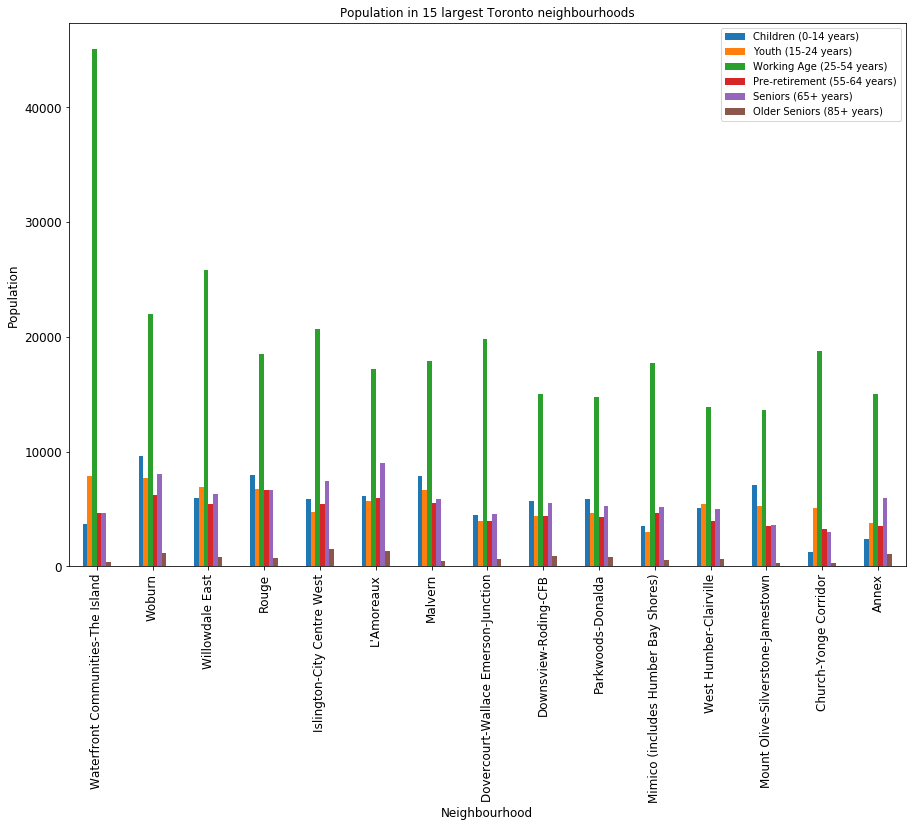

In [25]:
#plot population in the 15 largest neighbourhoods

ax = top_pop_rename[['Children (0-14 years)','Youth (15-24 years)', 'Working Age (25-54 years)', 'Pre-retirement (55-64 years)', 'Seniors (65+ years)','Older Seniors (85+ years)']].plot(kind='bar', title ="Population in 15 largest Toronto neighbourhoods", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Population", fontsize=12)
plt.show()

## Vulnerable Population Stats 

### Isolate rows to only the ones having children and seniors

In [26]:
vuln_age_df = age_stats_df[(age_stats_df.Characteristic == 'Children (0-14 years)') | (age_stats_df.Characteristic == 'Seniors (65+ years)') | (age_stats_df.Characteristic == 'Older Seniors (85+ years)')]


In [27]:
vuln_age_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135,3840,3075,1760,2360,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945,6045,4105,2015,5910,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000,925,555,320,1040,...,655,885,1130,170,125,880,165,470,400,775


### Getting neighbourhood columns featuring vuln population from dataframe

In [28]:
#getting neighbourhood columns from dataframe

age_num_vuln = vuln_age_df.loc[:, 'Agincourt North':'Yorkdale-Glen Park']
age_num_vuln.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775


### Adding new sum row for each vuln neighbourhood

In [29]:
age_num_vuln.loc['Sum'] = age_num_vuln.sum()

In [30]:
age_num_vuln

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775
Sum,10810,7735,4095,9310,12220,5975,4445,6640,5940,9195,...,5810,9345,18765,3875,2385,5890,3565,4585,7975,6030


### Fix Mimico column in vuln dataframe so matches when combining with other dataframe

In [31]:
# fix mimico column

age_num_vuln = age_num_vuln.rename(columns={'Mimico (includes Humber Bay Shores)': 'Mimico - includes Humber Bay Shores'})
age_num_vuln

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775
Sum,10810,7735,4095,9310,12220,5975,4445,6640,5940,9195,...,5810,9345,18765,3875,2385,5890,3565,4585,7975,6030


### Checking columns in vuln population dataframe

In [32]:
age_num_vuln.columns.values.tolist()

['Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',
 'Forest Hill North'

### Get stats - max, min and avg - for each of the columns in the vuln dataframe

In [33]:
#get stats

age_max_df = age_num_vuln.loc[:, 'Agincourt North':'Yorkdale-Glen Park'].max(axis=1)
age_min_df = age_num_vuln.loc[:, 'Agincourt North': 'Yorkdale-Glen Park'].min(axis=1)
age_avg_df = age_num_vuln.loc[:, 'Agincourt North': 'Yorkdale-Glen Park'].mean(axis=1)

print('Max: ')
print(age_max_df)
print('Min: ')
print(age_min_df)
print('Avg: ')
print(age_avg_df)

Max: 
9       9625
13      8990
14      1640
Sum    18765
dtype: int64
Min: 
9       565
13      730
14       50
Sum    2190
dtype: int64
Avg: 
9      2843.964286
13     3048.285714
14      471.035714
Sum    6363.285714
dtype: float64


### Using the sum, get top 15 neighbourhoods based on larger size of vuln population

In [34]:
age_sort_vuln = age_num_vuln.loc[:, age_num_vuln.max().sort_values(ascending=False).index]

age_sort_vuln

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,1130,1345,685,1480,445,830,1640,870,775,700,...,165,175,140,140,195,115,50,125,145,305
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


In [35]:
#getting top 15 neighbourhoods 

top_num_vuln = age_sort_vuln.iloc[:, : 15]
top_num_vuln

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,Tam O'Shanter-Sullivan,Mount Olive-Silverstone-Jamestown,Agincourt North,Bendale,West Humber-Clairville
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,3885,7090,3840,4550,5060
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,6160,3560,6045,5250,4980
14,1130,1345,685,1480,445,830,1640,870,775,700,1220,300,925,900,615
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,11265,10950,10810,10700,10655


In [36]:
top_num_vuln.shape

(4, 15)

### Transpose and rename rows with vuln population age groups

In [37]:
#switch rows and columns in top_num_vuln

top_num_vuln = top_num_vuln.T

In [38]:
top_num_vuln

,9,13,14,Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245
Willowdale East,5920,6270,830,13020
Banbury-Don Mills,3605,6975,1640,12220
Downsview-Roding-CFB,5725,5535,870,12130
Parkwoods-Donalda,5840,5250,775,11865
Glenfield-Jane Heights,5790,5005,700,11495


In [39]:
#rename columns for vuln populations

top_vuln_rename = top_num_vuln.rename({9: 'Children (0-14 years)', 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='columns')

top_vuln_rename

,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245
Willowdale East,5920,6270,830,13020
Banbury-Don Mills,3605,6975,1640,12220
Downsview-Roding-CFB,5725,5535,870,12130
Parkwoods-Donalda,5840,5250,775,11865
Glenfield-Jane Heights,5790,5005,700,11495


### Plot vulnerable neighbourhood populations

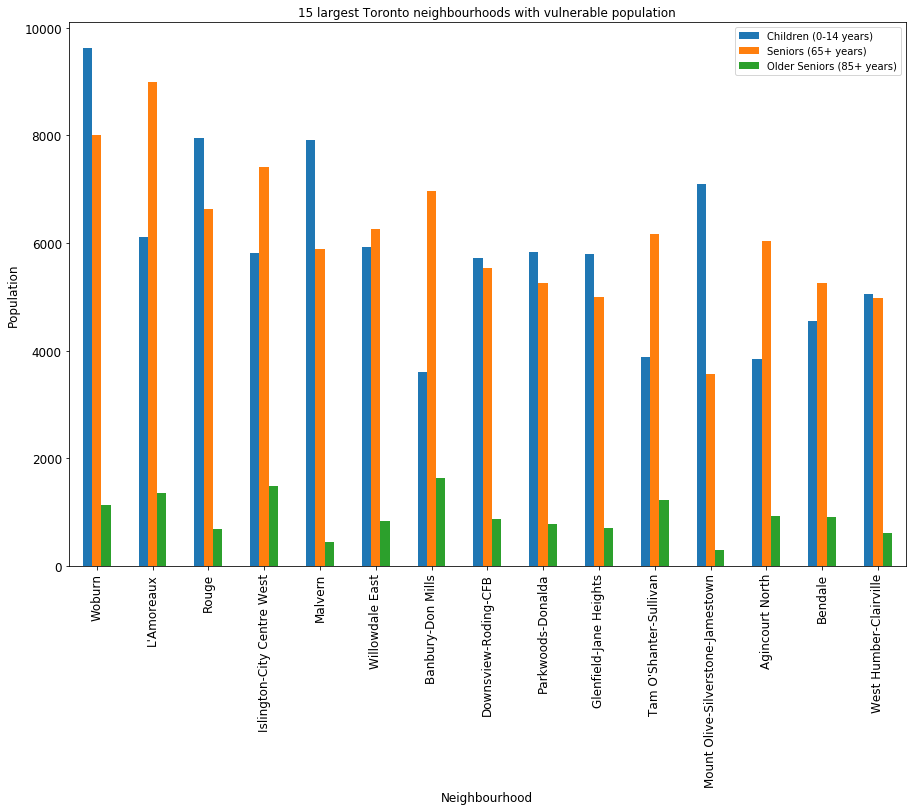

In [40]:
ax1 = top_vuln_rename[['Children (0-14 years)','Seniors (65+ years)','Older Seniors (85+ years)']].plot(kind='bar', title ="15 largest Toronto neighbourhoods with vulnerable population", figsize=(15, 10), legend=True, fontsize=12)
ax1.set_xlabel("Neighbourhood", fontsize=12)
ax1.set_ylabel("Population", fontsize=12)
plt.show()

### Combining vulnerable population dataframe with categorical columns from other dataframe

In [41]:
# Getting category data from vuln_age_df

chara_vuln = vuln_age_df.loc[:, 'Category':'City of Toronto']
chara_vuln

,Category,Topic,Data Source,Characteristic,City of Toronto
9,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135
13,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945
14,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000


In [42]:
#combining 2 dfs together

together_vuln = pd.concat([chara_vuln, age_sort_vuln], axis=1, sort=False)
together_vuln

,Category,Topic,Data Source,Characteristic,City of Toronto,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135.0,9625,6120,7960,5820,7910,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945.0,8010,8990,6625,7405,5890,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000.0,1130,1345,685,1480,445,...,165,175,140,140,195,115,50,125,145,305
Sum,NaN,NaN,NaN,NaN,NaN,18765,16455,15270,14705,14245,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


### Change Mimico value in dataframe with all neighbourhoods

In [43]:
#new_neighbourhood_df = neighbourhood_df['AREA_NAME'].str.replace(r"\(.*\)","")
#new_neighbourhood_df.head()

new_neighbourhood_df = neighbourhood_df
new_neighbourhood_df.head()

#age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'] = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'].apply(pd.to_numeric) 


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [44]:
#find mimico as has in area_name column so can switch word in brackets so the row is not affected after regex is applied and dataframes combined
new_neighbourhood_df.loc[new_neighbourhood_df.AREA_NAME == 'Mimico (includes Humber Bay Shores) (17)', 'AREA_NAME'] = 'Mimico - includes Humber Bay Shores (17)'

In [45]:
#check if value was properly changed
#new_neighbourhood_df.get_value(16, 'AREA_NAME')

mimico_check = new_neighbourhood_df['AREA_NAME'].values[16]
print(mimico_check)


Mimico - includes Humber Bay Shores (17)


### Remove numbers in brackets in neighbourhood_df(which has all neighbourhoods)... column AREA_NAME

In [46]:
new_neighbourhood_df.loc[:, 'AREA_NAME'] = new_neighbourhood_df.loc[:, 'AREA_NAME'].str.replace(r"\(.*\)","")
new_neighbourhood_df.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood,Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton,Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair,Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights,York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park,Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


### Check to make sure part of value in brackets was removed

In [47]:
mimico_check = new_neighbourhood_df['AREA_NAME'].values[16]
print(mimico_check)

Mimico - includes Humber Bay Shores 


### Get columns wanted in neighbourhood dataframe and sort by the name of the neighbourhood

In [48]:
new_neighbourhood_df = new_neighbourhood_df[['AREA_NAME', 'LONGITUDE', 'LATITUDE']]
new_neighbourhood_df.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Wychwood,-79.425515,43.676919
1,Yonge-Eglinton,-79.403590,43.704689
2,Yonge-St.Clair,-79.397871,43.687859
3,York University Heights,-79.488883,43.765736
4,Yorkdale-Glen Park,-79.457108,43.714672


In [49]:
new_neighbourhood_sort = new_neighbourhood_df.sort_values('AREA_NAME')
new_neighbourhood_sort.head()


,AREA_NAME,LONGITUDE,LATITUDE
74,Agincourt North,-79.266712,43.805441
75,Agincourt South-Malvern West,-79.265612,43.788658
76,Alderwood,-79.541611,43.604937
77,Annex,-79.404001,43.671585
78,Banbury-Don Mills,-79.349718,43.737657


### Reset index of dataframe

In [50]:
new_neighbourhood_reset = new_neighbourhood_sort.reset_index(drop=True)
new_neighbourhood_reset.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Agincourt North,-79.266712,43.805441
1,Agincourt South-Malvern West,-79.265612,43.788658
2,Alderwood,-79.541611,43.604937
3,Annex,-79.404001,43.671585
4,Banbury-Don Mills,-79.349718,43.737657


# Combining dataframes 

### All age groups section - use column 'AREA_NAME' to merge

In [51]:
#switching rows and columns
age_num_rename = age_num_all.rename({9: 'Children (0-14 years)', 10:'Youth (15-24 years)', 11: 'Working Age (25-54 years)' , 12: 'Pre-retirement (55-64 years)' , 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='rows')
age_num_rename = age_num_rename.T
age_num_rename.head()

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Agincourt North,3840,3705,11305,4230,6045,925,30050
Agincourt South-Malvern West,3075,3360,9965,3265,4105,555,24325
Alderwood,1760,1235,5220,1825,2015,320,12375
Annex,2360,3750,15040,3480,5910,1040,31580
Banbury-Don Mills,3605,2730,10810,3555,6975,1640,29315


### Add AREA_NAME as column name to column with all the neighbourhoods

In [52]:
#adding column name to neighbourhood rows

age_num_rename.index.name = 'AREA_NAME'
age_num_rename.reset_index(inplace=True)
age_num_rename.head()

,AREA_NAME,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,3840,3705,11305,4230,6045,925,30050
1,Agincourt South-Malvern West,3075,3360,9965,3265,4105,555,24325
2,Alderwood,1760,1235,5220,1825,2015,320,12375
3,Annex,2360,3750,15040,3480,5910,1040,31580
4,Banbury-Don Mills,3605,2730,10810,3555,6975,1640,29315


### Rename Mimico row for matching purposes with other dataframe

In [53]:
age_num_rename.loc[age_num_rename.AREA_NAME == 'Mimico (includes Humber Bay Shores)', 'AREA_NAME'] = 'Mimico - includes Humber Bay Shores'

### Remove trailing space for values in AREA_NAME column

In [54]:
no_space_df = new_neighbourhood_reset

#no_space_df.head()

no_space_df.loc[:, 'AREA_NAME'] = no_space_df.loc[:, 'AREA_NAME'].str.strip()

In [55]:
no_space_df.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Agincourt North,-79.266712,43.805441
1,Agincourt South-Malvern West,-79.265612,43.788658
2,Alderwood,-79.541611,43.604937
3,Annex,-79.404001,43.671585
4,Banbury-Don Mills,-79.349718,43.737657


### Checks to make sure trailing space is gone

In [56]:
#Check 
val_check4 = no_space_df['AREA_NAME'].values[0]
val_check4

'Agincourt North'

In [57]:
#Check
val_check2 = age_num_rename['AREA_NAME'].values[0]
val_check2

'Agincourt North'

In [58]:
#Check 
val_check3 = new_neighbourhood_reset['AREA_NAME'].values[0]
val_check3

'Agincourt North'

### Merge neighbourhood dataframes together

In [59]:
combined_df = pd.merge(no_space_df, age_num_rename, on='AREA_NAME')
combined_df.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,-79.266712,43.805441,3840,3705,11305,4230,6045,925,30050
1,Agincourt South-Malvern West,-79.265612,43.788658,3075,3360,9965,3265,4105,555,24325
2,Alderwood,-79.541611,43.604937,1760,1235,5220,1825,2015,320,12375
3,Annex,-79.404001,43.671585,2360,3750,15040,3480,5910,1040,31580
4,Banbury-Don Mills,-79.349718,43.737657,3605,2730,10810,3555,6975,1640,29315


### Sorting dataframe by sum and resetting index

In [60]:
#sort by sum

combined_df_sort = combined_df.sort_values('Sum', ascending=False)
combined_df_sort.reset_index(drop=True)
combined_df_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
120,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
129,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
126,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
103,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
57,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440


In [61]:
combined_df_sort = combined_df_sort.reset_index(drop=True)
combined_df_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
1,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
2,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
3,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
4,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440


### Getting top 15 total neighbourhood population from merged dataframe

In [62]:
top_15_pop = combined_df_sort.iloc[:15, :]
top_15_pop

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
1,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
2,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
3,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
4,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440
5,L'Amoreaux,-79.314084,43.795716,6120,5730,17210,5930,8990,1345,45325
6,Malvern,-79.222517,43.803658,7910,6620,17865,5535,5890,445,44265
7,Dovercourt-Wallace Emerson-Junction,-79.438541,43.665677,4480,3925,19790,3935,4515,595,37240
8,Downsview-Roding-CFB,-79.490497,43.733292,5725,4340,15045,4380,5535,870,35895
9,Parkwoods-Donalda,-79.330180,43.755033,5840,4680,14780,4265,5250,775,35590


# For Vulnerable populations

In [63]:
#switch rows and columns

age_sort_vuln.head()


,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,1130,1345,685,1480,445,830,1640,870,775,700,...,165,175,140,140,195,115,50,125,145,305
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


### Rename columns with vuln groups

In [64]:
vuln_num_rename = age_sort_vuln.rename({9: 'Children (0-14 years)', 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='rows')
vuln_num_rename = vuln_num_rename.T
vuln_num_rename.head()

,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245


In [65]:
vuln_num_rename.shape

(140, 4)

### Rename column with neighbourhoods to AREA_NAME

In [66]:
vuln_num_rename.index.name = 'AREA_NAME'
vuln_num_rename.reset_index(inplace=True)
vuln_num_rename.head()

,AREA_NAME,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,9625,8010,1130,18765
1,L'Amoreaux,6120,8990,1345,16455
2,Rouge,7960,6625,685,15270
3,Islington-City Centre West,5820,7405,1480,14705
4,Malvern,7910,5890,445,14245


### Combine dataframes - vuln

In [67]:
combined_vuln_df = pd.merge(no_space_df, vuln_num_rename, on='AREA_NAME')
combined_vuln_df.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,-79.266712,43.805441,3840,6045,925,10810
1,Agincourt South-Malvern West,-79.265612,43.788658,3075,4105,555,7735
2,Alderwood,-79.541611,43.604937,1760,2015,320,4095
3,Annex,-79.404001,43.671585,2360,5910,1040,9310
4,Banbury-Don Mills,-79.349718,43.737657,3605,6975,1640,12220


### Sorting vuln neighbourhoods by sum and then reset index

In [68]:
#sort vuln by sum

combined_vuln_sort = combined_vuln_df.sort_values('Sum', ascending=False)
combined_vuln_sort.reset_index(drop=True)
combined_vuln_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
129,Woburn,-79.228586,43.766740,9625,8010,1130,18765
64,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
103,Rouge,-79.186343,43.821201,7960,6625,685,15270
57,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
72,Malvern,-79.222517,43.803658,7910,5890,445,14245


In [69]:
combined_vuln_sort = combined_vuln_sort.reset_index(drop=True)
combined_vuln_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,-79.228586,43.766740,9625,8010,1130,18765
1,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
2,Rouge,-79.186343,43.821201,7960,6625,685,15270
3,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
4,Malvern,-79.222517,43.803658,7910,5890,445,14245


### Get top 15 neighbourhoods with highest vulnerable population

In [70]:
#top 15 vuln

top_15_vuln = combined_vuln_sort.iloc[:15, :]
top_15_vuln

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,-79.228586,43.766740,9625,8010,1130,18765
1,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
2,Rouge,-79.186343,43.821201,7960,6625,685,15270
3,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
4,Malvern,-79.222517,43.803658,7910,5890,445,14245
5,Willowdale East,-79.401484,43.770602,5920,6270,830,13020
6,Banbury-Don Mills,-79.349718,43.737657,3605,6975,1640,12220
7,Downsview-Roding-CFB,-79.490497,43.733292,5725,5535,870,12130
8,Parkwoods-Donalda,-79.330180,43.755033,5840,5250,775,11865
9,Glenfield-Jane Heights,-79.513465,43.745636,5790,5005,700,11495


## Mapping data marker for top 15 neighbourhoods with vulnerable population groups - red

In [71]:
#Add markers
for lat, lng, label in zip(top_15_vuln['LATITUDE'], top_15_vuln['LONGITUDE'], top_15_vuln['AREA_NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#c94b2e',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(toronto_map)

toronto_map

# Visualization

In [72]:
#Test
import seaborn as sns 

#test1=sns.kdeplot(top_pop_rename.loc[top_pop_rename['Children (0-14 years)'], 'Sum'], color='b', shade=True, Label='Children (0-14 years)') 
#plt.xlabel('Demographic Group') 
#plt.ylabel('Population') 

#test1 = top_pop_rename.groupby('Children (0-14 years)').sum.plot(kind='kde')
#test1

#sns.distplot(top_vuln_rename['Children (0-14 years)'], hist=True, kde=True, 
#             bins=5, color = 'darkblue', 
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 4})

## Pie chart for Woburn neighbourhood - from vuln dataframe comparing to all neighbourhood dataframe

### Woburn pie chart with all neighbourhoods

In [73]:
#pie chart with all neighbourhoods

df_1 = top_pop_rename.T
df_1

,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,Mimico (includes Humber Bay Shores),West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Church-Yonge Corridor,Annex
Children (0-14 years),3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,3505,5060,7090,1260,2360
Youth (15-24 years),7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,3010,5445,5240,5060,3750
Working Age (25-54 years),45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,17695,13845,13615,18780,15040
Pre-retirement (55-64 years),4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,4620,3990,3475,3235,3480
Seniors (65+ years),4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,5160,4980,3560,3010,5910
Older Seniors (85+ years),365,1130,830,685,1480,1345,445,595,870,775,565,615,300,250,1040
Sum,66275,54615,51270,47170,45440,45325,44265,37240,35895,35590,34555,33935,33280,31595,31580


In [74]:
df_1.index.name = 'Age'
df_1.reset_index(inplace=True)
df_1.head()

,Age,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,Mimico (includes Humber Bay Shores),West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Church-Yonge Corridor,Annex
0,Children (0-14 years),3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,3505,5060,7090,1260,2360
1,Youth (15-24 years),7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,3010,5445,5240,5060,3750
2,Working Age (25-54 years),45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,17695,13845,13615,18780,15040
3,Pre-retirement (55-64 years),4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,4620,3990,3475,3235,3480
4,Seniors (65+ years),4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,5160,4980,3560,3010,5910


In [75]:
#remove sum row

df_1 = df_1[:-1]

df_1

,Age,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,Mimico (includes Humber Bay Shores),West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Church-Yonge Corridor,Annex
0,Children (0-14 years),3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,3505,5060,7090,1260,2360
1,Youth (15-24 years),7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,3010,5445,5240,5060,3750
2,Working Age (25-54 years),45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,17695,13845,13615,18780,15040
3,Pre-retirement (55-64 years),4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,4620,3990,3475,3235,3480
4,Seniors (65+ years),4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,5160,4980,3560,3010,5910
5,Older Seniors (85+ years),365,1130,830,685,1480,1345,445,595,870,775,565,615,300,250,1040


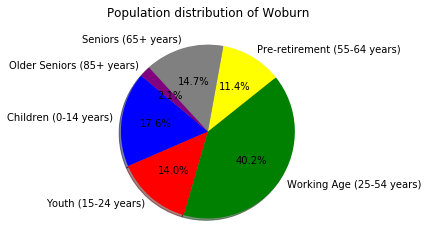

In [76]:
#Pie chart using Woburn as that is present as a top population overall as well as vulnerable

age_data = df_1['Age']
woburn_pop_data = df_1['Woburn']
colors = ["blue", "red", "green", "yellow", "grey", "purple"]
#explode = (0.1, 0, 0, 0, 0)  
plt.pie(woburn_pop_data, labels=age_data, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Population distribution of Woburn")
plt.show()

### Pie chart for vulnerable portion of Woburn

In [77]:
df_2 = top_vuln_rename.T
df_2.head()

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,Tam O'Shanter-Sullivan,Mount Olive-Silverstone-Jamestown,Agincourt North,Bendale,West Humber-Clairville
Children (0-14 years),9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,3885,7090,3840,4550,5060
Seniors (65+ years),8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,6160,3560,6045,5250,4980
Older Seniors (85+ years),1130,1345,685,1480,445,830,1640,870,775,700,1220,300,925,900,615
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,11265,10950,10810,10700,10655


In [78]:
df_2.index.name = 'Age'
df_2.reset_index(inplace=True)

#remove sum row
df_2 = df_2[:-1]
df_2

,Age,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,Tam O'Shanter-Sullivan,Mount Olive-Silverstone-Jamestown,Agincourt North,Bendale,West Humber-Clairville
0,Children (0-14 years),9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,3885,7090,3840,4550,5060
1,Seniors (65+ years),8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,6160,3560,6045,5250,4980
2,Older Seniors (85+ years),1130,1345,685,1480,445,830,1640,870,775,700,1220,300,925,900,615


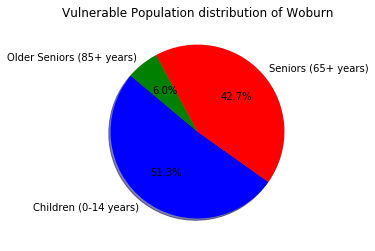

In [79]:
#Pie chart using Woburn as that is present as a top population overall as well as vulnerable

age_data_vuln = df_2['Age']
woburn_vuln_data = df_2['Woburn']
colors = ["blue", "red", "green"]
#explode = (0.1, 0, 0, 0, 0)  
plt.pie(woburn_vuln_data, labels=age_data_vuln, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Vulnerable Population distribution of Woburn")
plt.show()

# Visualize hospitals on map using Foursquare

In [80]:
import requests # library to handle requests
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


In [81]:
# get avg value of latitude and longitude for neighbourhoods

combined_df.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,-79.266712,43.805441,3840,3705,11305,4230,6045,925,30050
1,Agincourt South-Malvern West,-79.265612,43.788658,3075,3360,9965,3265,4105,555,24325
2,Alderwood,-79.541611,43.604937,1760,1235,5220,1825,2015,320,12375
3,Annex,-79.404001,43.671585,2360,3750,15040,3480,5910,1040,31580
4,Banbury-Don Mills,-79.349718,43.737657,3605,2730,10810,3555,6975,1640,29315


### Get average latitude and longitude of all the neighbourhoods

In [82]:
neighbourhood_avg_df = combined_df.loc[:, 'LONGITUDE': 'LATITUDE'].mean(axis=0)
print(neighbourhood_avg_df)

LONGITUDE   -79.400178
LATITUDE     43.709682
dtype: float64


In [83]:
neighbourhood_latitude = 43.709682
neighbourhood_longitude = -79.400178

### Add purple marker to map using the average coordinates of all the neighbourhoods

In [84]:
folium.CircleMarker(
    [neighbourhood_latitude, neighbourhood_longitude],
    radius=10,
    color='#bd378e',
    popup='Center of all neighbourhoods',
    fill = True,
    fill_color = '#bd378e',
    fill_opacity = 0.6
).add_to(toronto_map)

toronto_map

### Use category id and url to search for hospitals within 5km of the center of all the neighbourhoods

In [85]:
#category id for hospitals
category_id = '4bf58dd8d48988d196941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&categoryId={}&ll={},{}&radius=5000&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, category_id, neighbourhood_latitude, neighbourhood_longitude, VERSION, LIMIT)


In [86]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9c00d90f59680026fff18e'},
 'response': {'venues': [{'id': '5de14daedb954c00086c07b2',
    'name': 'Sunnybrook Hospital',
    'location': {'address': '2075 Bayview Ave.',
     'lat': 43.721838,
     'lng': -79.375978,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.721838,
       'lng': -79.375978}],
     'distance': 2371,
     'postalCode': 'M4N 3M5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['2075 Bayview Ave.',
      'Toronto ON M4N 3M5',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587282317',
    'hasPerk': False},
   {'id': '521b3e7f11d27fbcf4f28be8',
    'name': 'Toronto Western Hospital 

### Turn json info for the hospitals into a dataframe

In [87]:
# assign relevant part of JSON to venues
hospitals = results['response']['venues']

# tranform venues into a dataframe
hospital_df = json_normalize(hospitals)
hospital_df.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,5de14daedb954c00086c07b2,2075 Bayview Ave.,CA,Toronto,Canada,NaN,2371,"[2075 Bayview Ave., Toronto ON M4N 3M5, Canada]","[{'label': 'display', 'lat': 43.721838, 'lng':...",43.721838,-79.375978,M4N 3M5,ON,Sunnybrook Hospital,v-1587282317
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,521b3e7f11d27fbcf4f28be8,NaN,CA,NaN,Canada,NaN,5127,[Canada],"[{'label': 'display', 'lat': 43.66440142573496...",43.664401,-79.388501,NaN,NaN,Toronto Western Hospital Fracture Clinic,v-1587282317
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4ed7a23c4690bd08d8f1f0d8,2075 Bayview Ave,CA,Toronto,Canada,Sunnybrook Hospital,2405,"[2075 Bayview Ave (Sunnybrook Hospital), Toron...","[{'label': 'display', 'lat': 43.72144044698284...",43.721440,-79.375099,M4N 3M5,ON,Dialysis Unit: Sunnybrook,v-1587282317
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4e145d051f6e33e71809ac4c,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,2505,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72177405381968...",43.721774,-79.373914,M4N 3M5,ON,E-wing: Sunnybrook,v-1587282317
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4e68eff014954826ade3c663,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,2545,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72345799761827...",43.723458,-79.374920,M4N 3M5,ON,Veterans Centre: Sunnybrook,v-1587282317


In [88]:
hospital_df.shape

(28, 17)

### Drop the location. prefix in front of column names and info not related to hospital location

In [89]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in hospital_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered = hospital_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sunnybrook Hospital,Hospital,2075 Bayview Ave.,CA,Toronto,Canada,NaN,2371,"[2075 Bayview Ave., Toronto ON M4N 3M5, Canada]","[{'label': 'display', 'lat': 43.721838, 'lng':...",43.721838,-79.375978,M4N 3M5,ON,5de14daedb954c00086c07b2
1,Toronto Western Hospital Fracture Clinic,Hospital,NaN,CA,NaN,Canada,NaN,5127,[Canada],"[{'label': 'display', 'lat': 43.66440142573496...",43.664401,-79.388501,NaN,NaN,521b3e7f11d27fbcf4f28be8
2,Dialysis Unit: Sunnybrook,Hospital,2075 Bayview Ave,CA,Toronto,Canada,Sunnybrook Hospital,2405,"[2075 Bayview Ave (Sunnybrook Hospital), Toron...","[{'label': 'display', 'lat': 43.72144044698284...",43.721440,-79.375099,M4N 3M5,ON,4ed7a23c4690bd08d8f1f0d8
3,E-wing: Sunnybrook,Hospital,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,2505,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72177405381968...",43.721774,-79.373914,M4N 3M5,ON,4e145d051f6e33e71809ac4c
4,Veterans Centre: Sunnybrook,Hospital,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,2545,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72345799761827...",43.723458,-79.374920,M4N 3M5,ON,4e68eff014954826ade3c663
5,Toronto Grace Health Centre,Hospital,650 Church St.,CA,Toronto,Canada,at Bloor St. E.,4554,"[650 Church St. (at Bloor St. E.), Toronto ON ...","[{'label': 'display', 'lat': 43.67064, 'lng': ...",43.670640,-79.383263,M4Y 2G3,ON,4bc8d9ac68f976b0871d5c83
6,Urology Department,Hospital,Wellness Way,CA,Toronto,Canada,NaN,2168,"[Wellness Way, Toronto ON M4G, Canada]","[{'label': 'display', 'lat': 43.721069, 'lng':...",43.721069,-79.378316,M4G,ON,59c27e3e98fbfc5bc1672f4e
7,D Wing: Sunnybrook,Hospital,NaN,CA,Toronto,Canada,2075 Bayview Ave.,2406,"[2075 Bayview Ave., Toronto ON, Canada]","[{'label': 'display', 'lat': 43.72128933035346...",43.721289,-79.374939,NaN,ON,4f4e38e7e4b04c96fb7ccd3d
8,Sunnybrook Health Sciences Centre,Hospital,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,2334,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,4ad797f6f964a520880c21e3
9,Mount Sinai Hospital Women's and Infants' Depa...,Hospital,"700 University Ave., 3rd floor, Ontario Power ...",CA,Toronto,Canada,at College St.,5625,"[700 University Ave., 3rd floor, Ontario Power...","[{'label': 'display', 'lat': 43.6596121502049,...",43.659612,-79.390761,NaN,ON,4b1fbe8af964a5209e2824e3


In [90]:
dataframe_filtered.shape

(28, 15)

### Remove rows containing veterinary

In [91]:
#remove rows which have veterinary in it

dataframe_filtered = dataframe_filtered[~dataframe_filtered.name.str.contains("Veterinary")]
dataframe_filtered.shape

(28, 15)

### Add hospitals close to center of all neighbourhoods to map using green circle marker

In [92]:
# add the hospitals as green circle markers - closest to avg of all neighbourhoods
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(toronto_map)

# display map
toronto_map

### Get vuln average latitude and longitude of top 15 vuln datasets

In [93]:
#get average latitude and longitude of top 15 vuln dataset

top_15_vuln

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,-79.228586,43.766740,9625,8010,1130,18765
1,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
2,Rouge,-79.186343,43.821201,7960,6625,685,15270
3,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
4,Malvern,-79.222517,43.803658,7910,5890,445,14245
5,Willowdale East,-79.401484,43.770602,5920,6270,830,13020
6,Banbury-Don Mills,-79.349718,43.737657,3605,6975,1640,12220
7,Downsview-Roding-CFB,-79.490497,43.733292,5725,5535,870,12130
8,Parkwoods-Donalda,-79.330180,43.755033,5840,5250,775,11865
9,Glenfield-Jane Heights,-79.513465,43.745636,5790,5005,700,11495


In [94]:
vuln_avg_df = top_15_vuln.loc[:, 'LONGITUDE': 'LATITUDE'].mean(axis=0)
print(vuln_avg_df)

LONGITUDE   -79.372723
LATITUDE     43.758132
dtype: float64


### Search for hospitals close to the center of the top 15 vuln areas

In [95]:
vuln_latitude = 43.758132
vuln_longitude = -79.372723

category_id = '4bf58dd8d48988d196941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&categoryId={}&ll={},{}&radius=5000&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, category_id, vuln_latitude, vuln_longitude, VERSION, LIMIT)


In [96]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5e9c018a6001fe001cd41878'},
 'response': {'venues': [{'id': '53793332498e11da36d33453',
    'name': 'north york general hospital critical care unit',
    'location': {'lat': 43.76489194801334,
     'lng': -79.3646698750467,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.76489194801334,
       'lng': -79.3646698750467}],
     'distance': 992,
     'cc': 'CA',
     'country': 'Canada',
     'formattedAddress': ['Canada']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587282318',
    'hasPerk': False},
   {'id': '4b6c7ba2f964a520bb3d2ce3',
    'name': 'North York General Hospital',
    'location': {'address': '4001 Leslie St',
     'crossStreet': 'at Sheppard Ave E',
     'lat': 43.768

### Transform hospital data close to top vuln population areas into dataframe

In [97]:
# assign relevant part of JSON to venues
hospitals_vuln = results1['response']['venues']

# tranform venues into a dataframe
hospitals_vuln_df = json_normalize(hospitals_vuln)
hospitals_vuln_df.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,53793332498e11da36d33453,NaN,CA,NaN,Canada,NaN,992,[Canada],"[{'label': 'display', 'lat': 43.76489194801334...",43.764892,-79.364670,NaN,NaN,north york general hospital critical care unit,v-1587282318
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4b6c7ba2f964a520bb3d2ce3,4001 Leslie St,CA,Toronto,Canada,at Sheppard Ave E,1428,"[4001 Leslie St (at Sheppard Ave E), Toronto O...","[{'label': 'display', 'lat': 43.76897368914205...",43.768974,-79.363209,M2K 1E1,ON,North York General Hospital,v-1587282318
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4ad797f6f964a520880c21e3,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,4086,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,Sunnybrook Health Sciences Centre,v-1587282318
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,5de14daedb954c00086c07b2,2075 Bayview Ave.,CA,Toronto,Canada,NaN,4048,"[2075 Bayview Ave., Toronto ON M4N 3M5, Canada]","[{'label': 'display', 'lat': 43.721838, 'lng':...",43.721838,-79.375978,M4N 3M5,ON,Sunnybrook Hospital,v-1587282318
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4ca8c4e3b0b8236ae2cab6e6,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,4057,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72178146634043...",43.721781,-79.376429,M4N 3M5,ON,M-wing: Sunnybrook,v-1587282318


In [98]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_vuln = ['name', 'categories'] + [col for col in hospitals_vuln_df.columns if col.startswith('location.')] + ['id']
dataframe_filtered_vuln = hospitals_vuln_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_vuln['categories'] = dataframe_filtered_vuln.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_vuln.columns = [column.split('.')[-1] for column in dataframe_filtered_vuln.columns]

dataframe_filtered_vuln

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,north york general hospital critical care unit,Hospital,NaN,CA,NaN,Canada,NaN,992,[Canada],"[{'label': 'display', 'lat': 43.76489194801334...",43.764892,-79.364670,NaN,NaN,53793332498e11da36d33453
1,North York General Hospital,Hospital,4001 Leslie St,CA,Toronto,Canada,at Sheppard Ave E,1428,"[4001 Leslie St (at Sheppard Ave E), Toronto O...","[{'label': 'display', 'lat': 43.76897368914205...",43.768974,-79.363209,M2K 1E1,ON,4b6c7ba2f964a520bb3d2ce3
2,Sunnybrook Health Sciences Centre,Hospital,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,4086,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,4ad797f6f964a520880c21e3
3,Sunnybrook Hospital,Hospital,2075 Bayview Ave.,CA,Toronto,Canada,NaN,4048,"[2075 Bayview Ave., Toronto ON M4N 3M5, Canada]","[{'label': 'display', 'lat': 43.721838, 'lng':...",43.721838,-79.375978,M4N 3M5,ON,5de14daedb954c00086c07b2
4,M-wing: Sunnybrook,Hospital,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Hospital,4057,"[2075 Bayview Avenue (Sunnybrook Hospital), To...","[{'label': 'display', 'lat': 43.72178146634043...",43.721781,-79.376429,M4N 3M5,ON,4ca8c4e3b0b8236ae2cab6e6
5,St. John Rehab Hospital,Hospital,285 Cummer Ave.,CA,North York,Canada,NaN,4092,"[285 Cummer Ave., North York ON M2M 2G1, Canada]","[{'label': 'display', 'lat': 43.78713574081794...",43.787136,-79.404002,M2M 2G1,ON,4bda7958c79cc92807fd7ee9
6,Emergency Room: Sunnybrook Hospital,Emergency Room,2075 Bayview Ave.,CA,North York,Canada,at Blythwood Rd.,4157,"[2075 Bayview Ave. (at Blythwood Rd.), North Y...","[{'label': 'display', 'lat': 43.72085439079596...",43.720854,-79.375890,M4N 3M5,ON,4b7a436df964a520da272fe3
7,Odette Cancer Centre: Sunnybrook,Hospital,2075 Bayview Avenue,CA,Toronto,Canada,Sunnybrook Health Sciences Centre,4208,[2075 Bayview Avenue (Sunnybrook Health Scienc...,"[{'label': 'display', 'lat': 43.72051876955621...",43.720519,-79.377997,M4N 3M5,ON,4d48448bdcdba143fba0eeb1
8,Holland Bloorview Kids Rehabilitation Hospital,Medical Center,150 Kilgour Rd.,CA,North York,Canada,at Bayview Ave.,4435,"[150 Kilgour Rd. (at Bayview Ave.), North York...","[{'label': 'display', 'lat': 43.71829338235304...",43.718293,-79.373632,M4G 1R8,ON,4ae1d932f964a520ea8721e3
9,F122: Sunnybrook,Hospital,2075 Bayview Ave,CA,Toronto,Canada,Sunnybrook Hospital,4087,"[2075 Bayview Ave (Sunnybrook Hospital), Toron...","[{'label': 'display', 'lat': 43.72141241408284...",43.721412,-79.373442,M4N 3M5,ON,4bec1cad6295c9b671798808


In [99]:
dataframe_filtered_vuln.shape

(27, 15)

In [100]:
#remove rows which have veterinary in it

dataframe_filtered_vuln = dataframe_filtered_vuln[~dataframe_filtered_vuln.name.str.contains("Veterinary")]
dataframe_filtered_vuln.shape

(26, 15)

### Map hospitals near vuln center(orange circle) using yellow marker

In [101]:
#add a orange circle marker to represent the center average between the top 15 most vulnerable neighbourhoods
folium.CircleMarker(
    [vuln_latitude, vuln_longitude],
    radius=10,
    color='orange',
    popup='Center of Vulnerable neighbourhoods',
    fill = True,
    fill_color = '#fca903',
    fill_opacity = 0.6
).add_to(toronto_map)

# add the hospitals to vulnerable population areas as yellow circle markers
for lat, lng, label in zip(dataframe_filtered_vuln.lat, dataframe_filtered_vuln.lng, dataframe_filtered_vuln.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(toronto_map)

# display map
toronto_map

In [102]:
#Plot different Folium maps so can separate between areas

# Boxplots

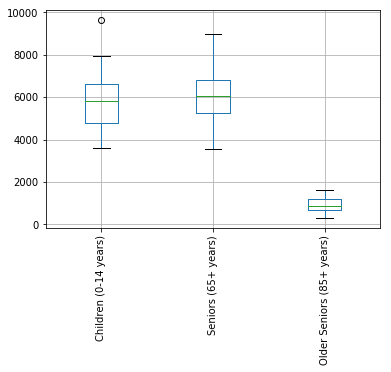

In [103]:
#boxplot
vuln_boxplot = top_15_vuln.boxplot(column=['Children (0-14 years)', 'Seniors (65+ years)', 'Older Seniors (85+ years)'], rot=90)
vuln_boxplot

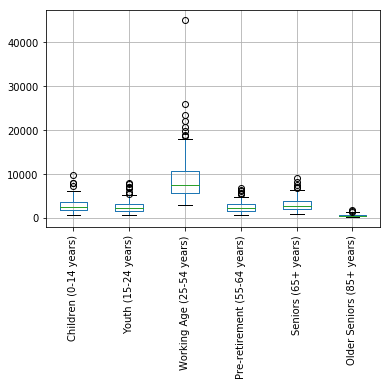

In [104]:
#boxplot for all neighbourhoods

#combined_df.head()

neighbourhood_boxplot = combined_df.boxplot(column=['Children (0-14 years)', 'Youth (15-24 years)', 'Working Age (25-54 years)', 'Pre-retirement (55-64 years)', 'Seniors (65+ years)', 'Older Seniors (85+ years)'], rot=90)
neighbourhood_boxplot 

# Distance between hospital coordinates and neighbourhoods

### Get columns wanted from earlier hospital dataframe for those coordinates near centre of all neighbourhoods

In [105]:
neighbourhood_hospital_dist = dataframe_filtered[['name', 'distance', 'lat', 'lng']]
neighbourhood_hospital_dist.head()

,name,distance,lat,lng
0,Sunnybrook Hospital,2371,43.721838,-79.375978
1,Toronto Western Hospital Fracture Clinic,5127,43.664401,-79.388501
2,Dialysis Unit: Sunnybrook,2405,43.721440,-79.375099
3,E-wing: Sunnybrook,2505,43.721774,-79.373914
4,Veterans Centre: Sunnybrook,2545,43.723458,-79.374920


### Get columns wanted, including distance, from dataframe with hospitals close to top 15 vuln neighbourhood centre

In [106]:
vuln_hospital_dist = dataframe_filtered_vuln[['name', 'distance', 'lat', 'lng']]

vuln_hospital_dist.head()

,name,distance,lat,lng
0,north york general hospital critical care unit,992,43.764892,-79.364670
1,North York General Hospital,1428,43.768974,-79.363209
2,Sunnybrook Health Sciences Centre,4086,43.721505,-79.376210
3,Sunnybrook Hospital,4048,43.721838,-79.375978
4,M-wing: Sunnybrook,4057,43.721781,-79.376429


### Sort dataframes by shortest to longest distance

In [107]:
#sort by distance

neighbourhood_hospital_dist = neighbourhood_hospital_dist.sort_values('distance')
vuln_hospital_dist = vuln_hospital_dist.sort_values('distance')

In [108]:
neighbourhood_hospital_dist = neighbourhood_hospital_dist.reset_index(drop=True)
neighbourhood_hospital_dist

,name,distance,lat,lng
0,Sunnybrook Hospital Critical Care Unit,1948,43.721409,-79.382202
1,Odette Cancer Centre: Sunnybrook,2154,43.720519,-79.377997
2,Urology Department,2168,43.721069,-79.378316
3,Purple Zone,2292,43.720727,-79.376125
4,Emergency Room: Sunnybrook Hospital,2316,43.720854,-79.375890
5,Sunnybrook Health Sciences Centre,2334,43.721505,-79.376210
6,Clinical Pathology: Sunnybrook,2335,43.721835,-79.376510
7,M-wing: Sunnybrook,2337,43.721781,-79.376429
8,Heart & Stroke Centre For Stroke Recovery,2338,43.721877,-79.376511
9,Holland Bloorview Kids Rehabilitation Hospital,2341,43.718293,-79.373632


In [109]:
vuln_hospital_dist = vuln_hospital_dist.reset_index(drop=True)
vuln_hospital_dist

,name,distance,lat,lng
0,north york general hospital critical care unit,992,43.764892,-79.364670
1,Travel Clinic,1416,43.769631,-79.365176
2,North York General Hospital,1428,43.768974,-79.363209
3,North York General Hospital Emergency Department,1521,43.769895,-79.363092
4,Sunnybrook Hospital - Department of Dentistry,2978,43.731430,-79.370340
5,Veterans Centre: Sunnybrook,3863,43.723458,-79.374920
6,Heart & Stroke Centre For Stroke Recovery,4047,43.721877,-79.376511
7,Sunnybrook Hospital,4048,43.721838,-79.375978
8,E-wing: Sunnybrook,4048,43.721774,-79.373914
9,Clinical Pathology: Sunnybrook,4052,43.721835,-79.376510
